### Configuring virtual environment
Enter the following commands in your terminal while located in the folder where you will download all your labs
1. python3 -m venv venv
2. source venv/bin/activate
You should now see (venv) next to your current working directory in the terminal. You can now install packages to your virtual environment and you can select venv as your Kernel in the top right of the notebook.

### Importing Libraries

In [1]:
!pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


### Vectorizing Data Set

In [2]:
# Vectorizing our data into a numpy array!
# Format: user_id, videos_watched, forum_posts, quizzes_done, git_commits, errors_fixed
data = np.genfromtxt(
    "userdata.csv",
    delimiter=",",
    skip_header=1,
    dtype=float,
    usecols=(1, 2, 3, 4, 5)
)
print(data.shape)
print(data)

(60, 5)
[[12.  2.  6.  4.  1.]
 [10.  1.  7.  3.  2.]
 [11.  2.  5.  5.  1.]
 [ 9.  1.  6.  2.  2.]
 [13.  3.  6.  4.  1.]
 [ 8.  2.  5.  3.  2.]
 [14.  1.  7.  5.  1.]
 [10.  2.  6.  4.  2.]
 [ 9.  3.  5.  3.  2.]
 [12.  1.  8.  4.  1.]
 [ 6.  7.  2.  1.  8.]
 [ 5.  6.  1.  0.  7.]
 [ 4.  8.  2.  1.  9.]
 [ 7.  5.  2.  0.  6.]
 [ 6.  6.  1.  1.  7.]
 [ 5.  9.  2.  0. 10.]
 [ 7.  7.  1.  2.  8.]
 [ 4.  6.  2.  1.  7.]
 [ 6.  5.  1.  0.  6.]
 [ 5.  7.  2.  1.  8.]
 [ 3.  1.  2.  0.  1.]
 [ 2.  0.  1.  0.  2.]
 [ 4.  1.  2.  1.  1.]
 [ 1.  0.  1.  0.  1.]
 [ 3.  2.  1.  0.  2.]
 [ 2.  1.  2.  0.  1.]
 [ 4.  0.  2.  1.  2.]
 [ 1.  1.  1.  0.  1.]
 [ 2.  2.  2.  0.  2.]
 [ 3.  0.  1.  1.  1.]
 [ 8.  3.  6.  1.  3.]
 [ 7.  2.  5.  1.  4.]
 [ 9.  3.  5.  2.  3.]
 [ 6.  4.  4.  1.  3.]
 [ 7.  3.  6.  2.  4.]
 [ 8.  2.  5.  1.  2.]
 [ 6.  3.  4.  2.  3.]
 [ 9.  2.  6.  1.  3.]
 [ 7.  4.  5.  2.  4.]
 [ 8.  3.  5.  1.  3.]
 [ 6.  1.  3.  7.  2.]
 [ 5.  1.  2.  8.  3.]
 [ 7.  0.  3.  9.  2.]
 [ 

In [4]:
# TODO: Print user0's data!
print(data[0])

# TODO: Print user0's quizzes_done!
print(data[0, 2])   

[12.  2.  6.  4.  1.]
6.0


### Calculating cosine distance

In [5]:
def cosineDist(a,b):
   #TODO
   dot = np.dot(a, b)
   norm_a = np.linalg.norm(a)
   norm_b = np.linalg.norm(b)
   if norm_a == 0 or norm_b == 0:
         return 1.0  # Define cosine distance as 1 if either vector is zero
   cosine_similarity = dot / (norm_a * norm_b)
   cosine_distance = 1 - cosine_similarity
   return cosine_distance

print(cosineDist(data[0], data[1]))


0.016604602435499327


### TODO: what does cosine distance represent in the example above?

### Calculating Minkowski distance

In [6]:
def minkowskiDistance(a, b, p):
    #TODO
    diff = np.abs(a - b) ** p
    sum_diff = np.sum(diff)
    distance = sum_diff ** (1 / p)
    return distance

print(minkowskiDistance(data[0], data[1], 2))



2.8284271247461903


### TODO: what does Euclidean distance represent in the example above?

In [7]:
# TODO: Find the max Euclidean distance between user0 and every other user.
distances = []
for i in data:
    dist = minkowskiDistance(data[0], i, 2)
    distances.append(dist)
    
print(max(distances))

14.52583904633395


### Plotting Euclidean distance vs cosine distance

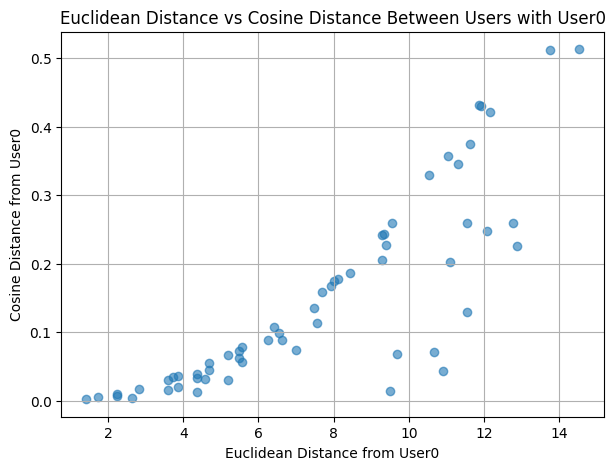

In [8]:
# let's plot User0's euclidean and cosine distance from every other user!

euclidean_vals = []
cosine_vals = []

n = len(data)
u0 = data[0]
for i in range(1, n):
    euclidean_vals.append(minkowskiDistance(u0, data[i], 2))
    cosine_vals.append(cosineDist(u0, data[i]))

euclidean_vals = np.array(euclidean_vals)
cosine_vals = np.array(cosine_vals)

plt.figure(figsize=(7, 5))
plt.scatter(euclidean_vals, cosine_vals, alpha=0.6)
plt.xlabel("Euclidean Distance from User0")
plt.ylabel("Cosine Distance from User0")
plt.title("Euclidean Distance vs Cosine Distance Between Users with User0")
plt.grid(True)
plt.show()


### Jaccard Similarity

In [9]:
# We need to binarize our data!
# Let's say: feature X is present if value >= 3

binary_data = (data >= 3).astype(int)
print(binary_data)
def jaccard_similarity(a, b):
    #TODO
    intersection = np.sum(a & b)
    union = np.sum(a | b)
    if union == 0:
        return 0.0  # Define Jaccard similarity as 0 if both sets are empty
    return intersection / union

# Jaccard similarity per user w.r.t user 0
u0 = binary_data[0]

intersection = np.sum(binary_data & u0, axis=1)
union = np.sum(binary_data | u0, axis=1)

#TODO
jaccard_scores = intersection / union
jaccard_scores[union == 0] = 0.0  # Handle division by zero

print(jaccard_scores)

[[1 0 1 1 0]
 [1 0 1 1 0]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [1 1 1 1 0]
 [1 0 1 1 0]
 [1 0 1 1 0]
 [1 0 1 1 0]
 [1 1 1 1 0]
 [1 0 1 1 0]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 1 0 1]
 [1 0 1 0 1]
 [1 1 1 0 1]
 [1 1 1 0 1]
 [1 1 1 0 1]
 [1 0 1 0 0]
 [1 1 1 0 1]
 [1 0 1 0 1]
 [1 1 1 0 1]
 [1 1 1 0 1]
 [1 0 1 1 0]
 [1 0 0 1 1]
 [1 0 1 1 0]
 [1 0 0 1 1]
 [1 0 1 1 0]
 [1 0 0 1 1]
 [1 0 1 1 1]
 [1 0 0 1 0]
 [1 0 1 1 1]
 [1 0 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[1.         1.         1.         0.66666667 0.75       1.
 1.         1.         0.75       1.         0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.2
 0.2        0.2        0.33333333 0.    